In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import re

### 1.Problem Statement : Classify whether an apple is good or bad based on its size, weight, sweetness, crunchiness, juiciness, ripeness and acidity 

### 2.Data Collection : Collected the dataset from kaggle website

In [3]:
data=pd.read_csv(r"C:\Users\Mahammad Iliyas\Downloads\apple_quality (1).csv")

In [4]:
datac=data.copy() # Making a copy of the data to avoid changes to my original data

In [5]:
datac

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


### 3.EDA

In [6]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
datac.shape # Null values are present

(4001, 9)

In [8]:
datac[datac["A_id"].isna()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [9]:
# Removing the null values
datac.drop(4000,axis=0,inplace=True)

In [10]:
datac.isna().sum() # No null values

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [11]:
# Checking the duplicates
datac[datac.duplicated()] # No duplicates

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


In [12]:
# Checking the outliers

In [13]:
datac["Quality"].value_counts() #Imbalanced

good    2004
bad     1996
Name: Quality, dtype: int64

In [14]:
c=0
for i in datac[datac["Quality"]=="good"].index:
    datac.drop(i,axis=0,inplace=True)
    c+=1
    if c==8:
        break

In [15]:
datac["Quality"].value_counts() #balanced data

bad     1996
good    1996
Name: Quality, dtype: int64

In [16]:
datac.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000
mean,2003.495741,-0.503016,-0.989049,-0.474619,0.987402,0.510253,0.499964
std,1152.542842,1.927974,1.602919,1.941021,1.402503,1.930152,1.874636
min,2.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,1005.750000,-1.816765,-2.011306,-1.738980,0.070087,-0.801502,-0.769363
50%,2003.500000,-0.512366,-0.984444,-0.507982,1.001667,0.530408,0.504336
75%,3001.250000,0.803896,0.034604,0.789879,1.897114,1.833940,1.770503
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [17]:
fv=datac.iloc[:,1:8]
cl=datac.iloc[:,8]

In [18]:
cl=cl.map({"good":1,"bad":0})

### 4.No need of data preprocessing as we are using Naive Bayes Algorithm and it is not based on distance there is no need to make the scales equal

### 5.EDA

In [19]:
fv["Acidity"]=fv["Acidity"].astype("float64") # As my Acidity column is object datatype i am converting it into float datatype

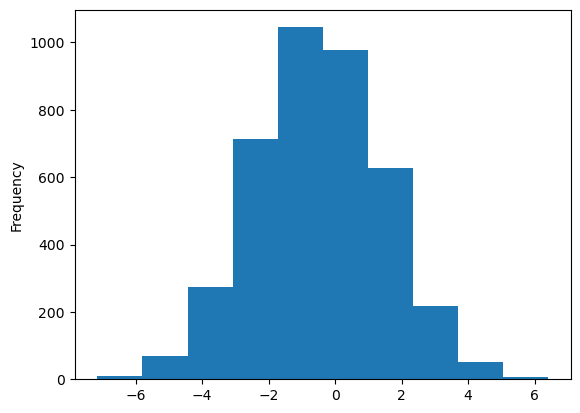

In [20]:
fv["Size"].plot.hist() # Normally distributed as the graph is a bell-shaped curve
plt.show()

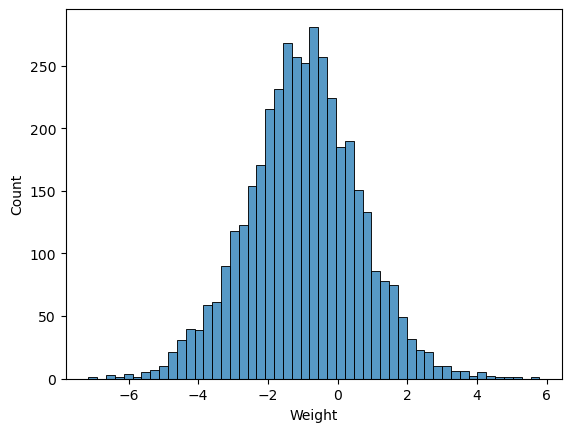

In [21]:
sns.histplot(fv["Weight"]) # Normally distributed as it is a bell shaped curve
plt.show()

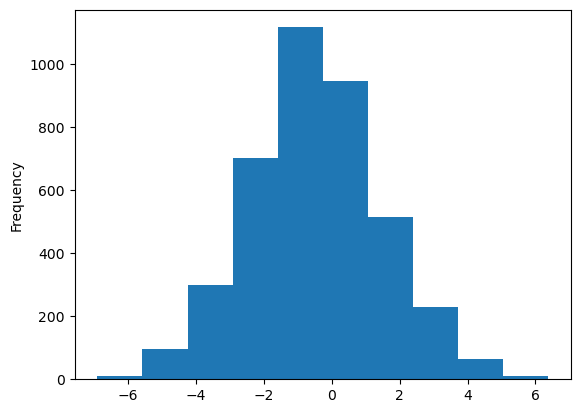

In [22]:
fv["Sweetness"].plot.hist()
plt.show()

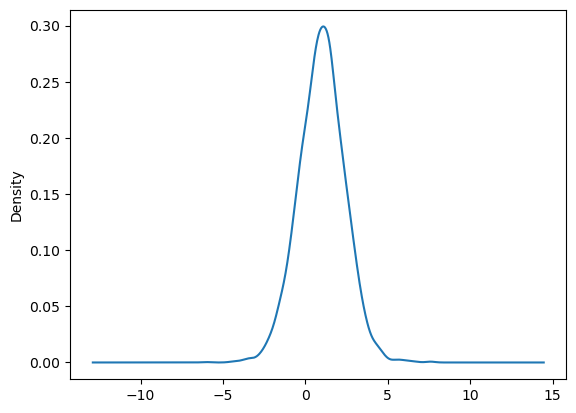

In [23]:
fv["Crunchiness"].plot.kde() # Normally distributed with left skewed and right skewed
plt.show()

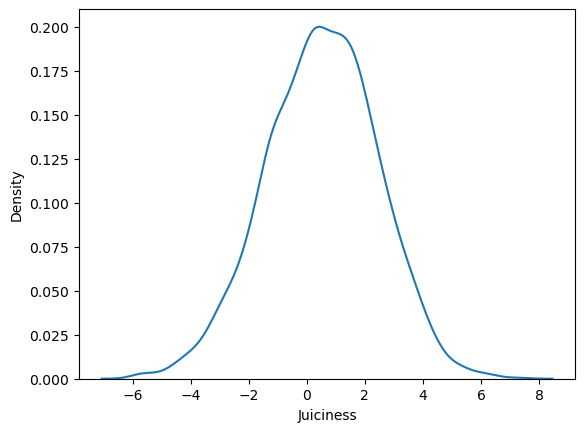

In [24]:
sns.kdeplot(fv["Juiciness"]) # normally distributed with a slight change
plt.show()

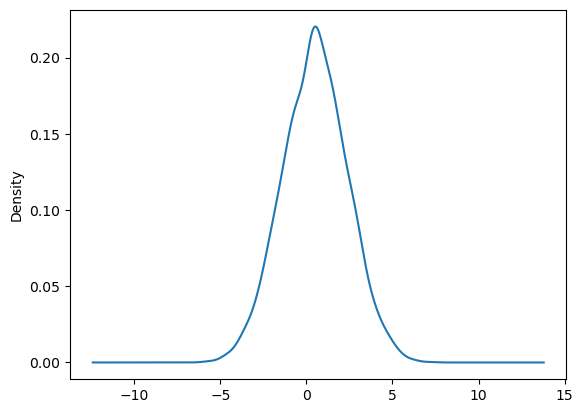

In [25]:
fv["Ripeness"].plot.kde() # Normally distributed
plt.show()

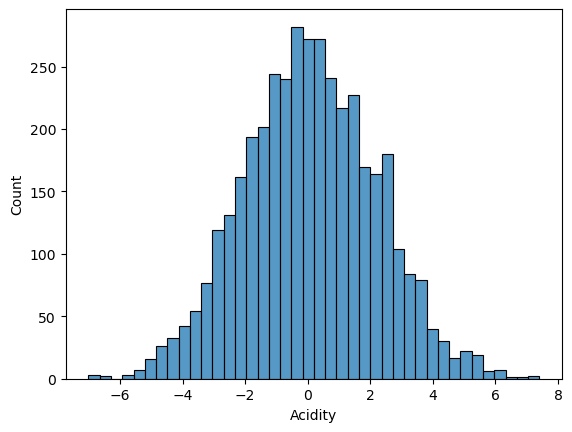

In [26]:
sns.histplot(fv["Acidity"]) # Normally distributed with a slight change
plt.show()

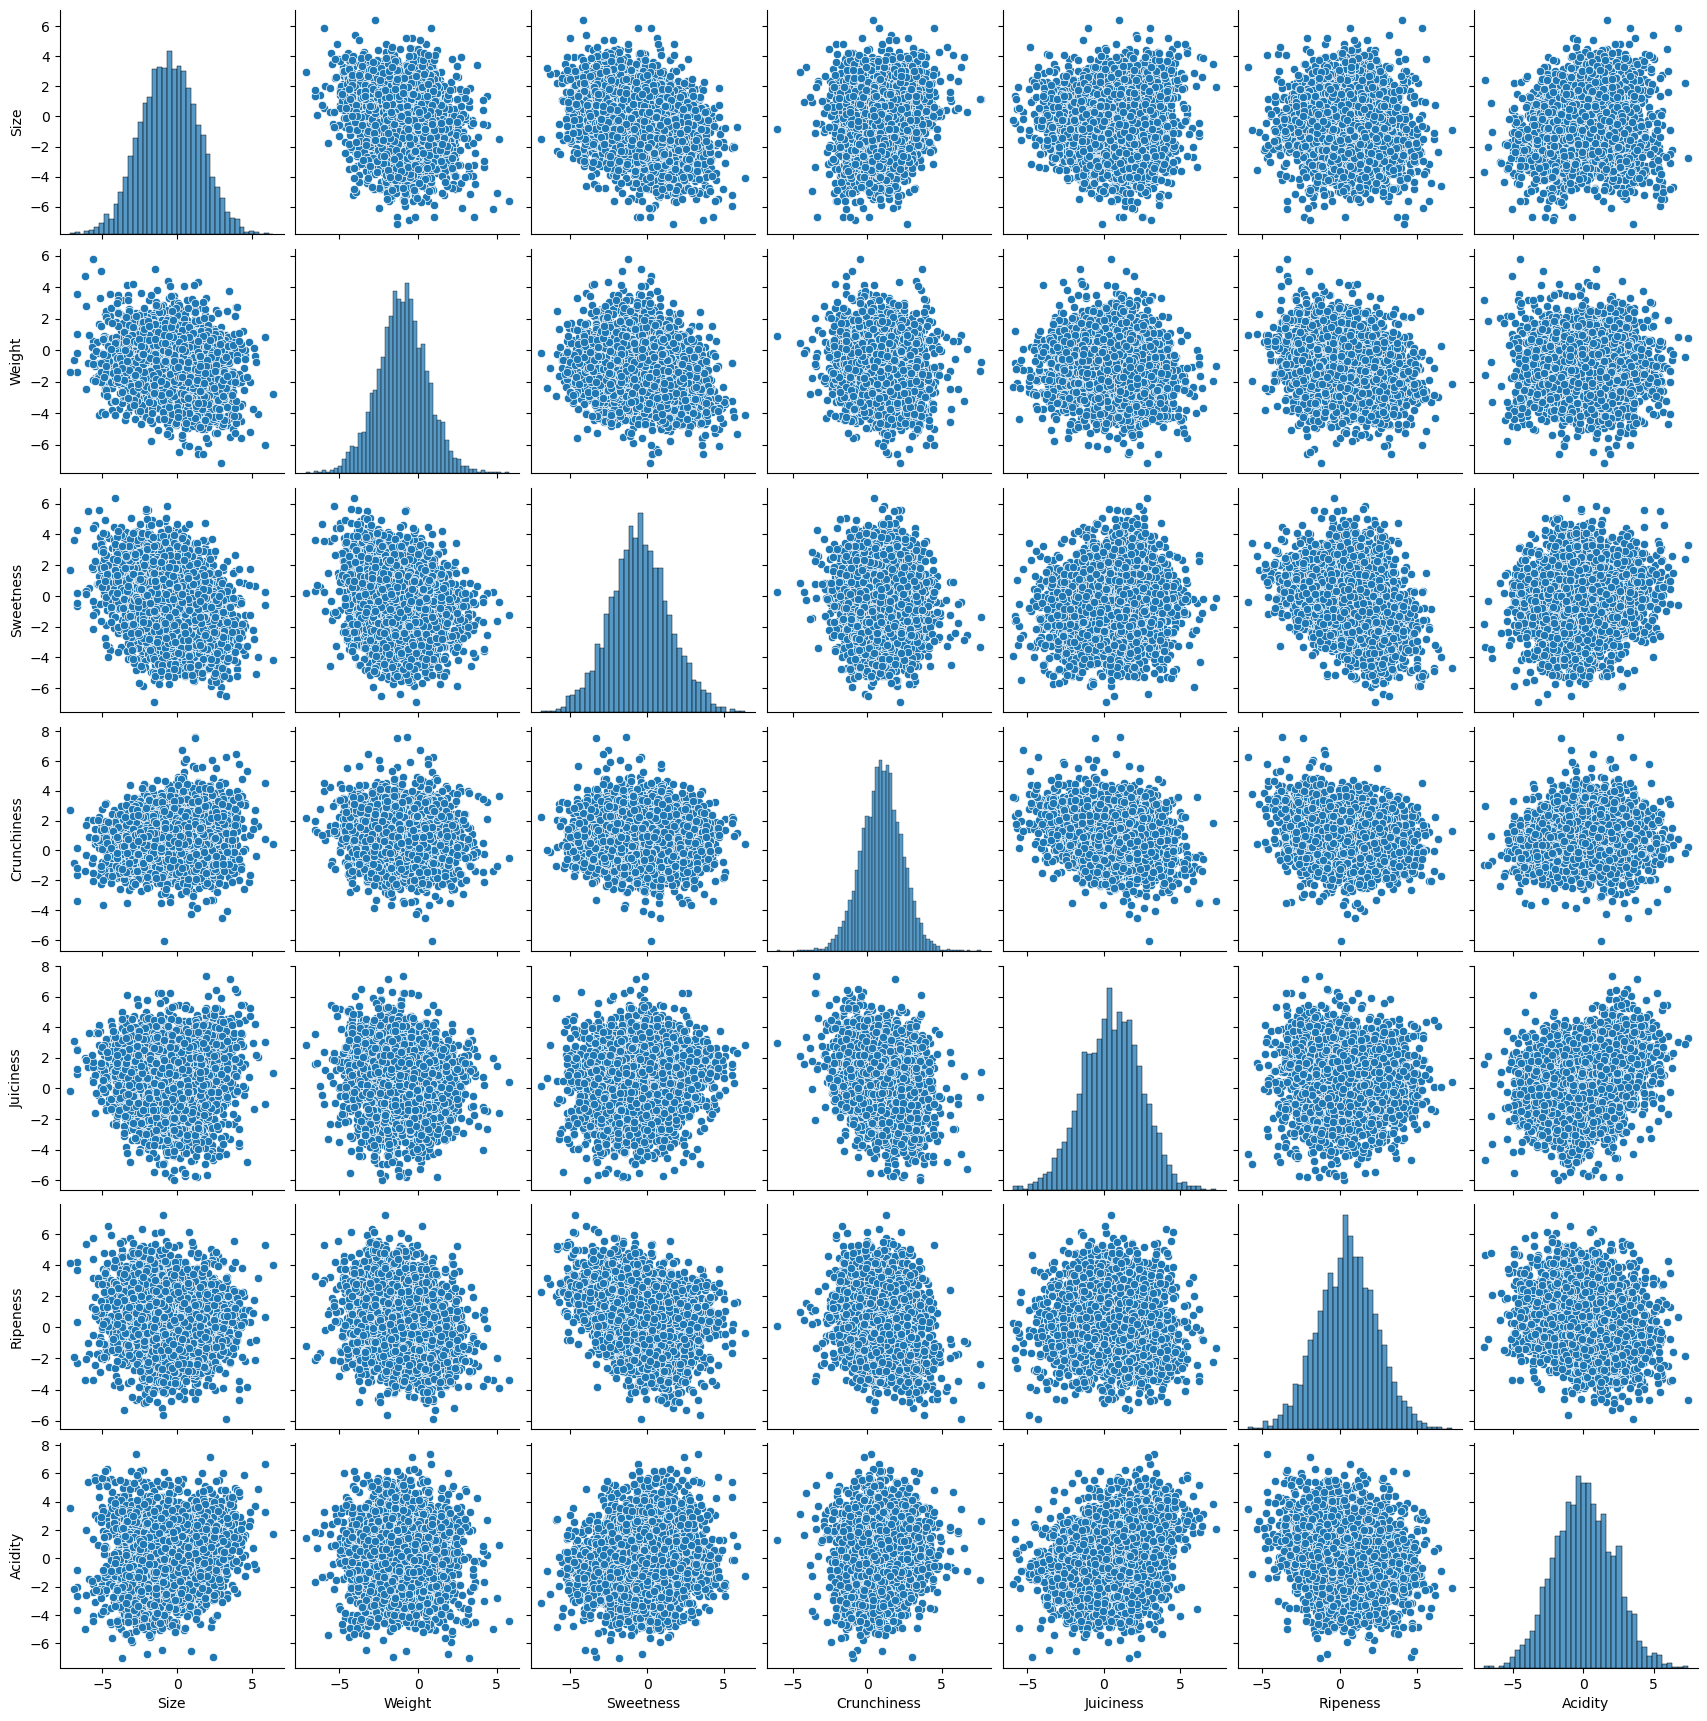

In [26]:
sns.pairplot(fv) # Scatter plot for all the numerical columns in my dataset

In [27]:
fv.corr() # As my Sweetness increases by 1 unit, weight decreases by 15%
# Negative correleation means if 1 quantity increases other quantity decreases
# Positive correlation menas if 1 quantity increases, other quantity also increases

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.171977,-0.323794,0.170180,-0.018701,-0.134668,0.195759
Weight,-0.171977,1.000000,-0.153398,-0.095545,-0.092248,-0.244189,0.015986
Sweetness,-0.323794,-0.153398,1.000000,-0.036181,0.094725,-0.273981,0.086379
Crunchiness,0.170180,-0.095545,-0.036181,1.000000,-0.258754,-0.203632,0.070316
Juiciness,-0.018701,-0.092248,0.094725,-0.258754,1.000000,-0.095602,0.248675
Ripeness,-0.134668,-0.244189,-0.273981,-0.203632,-0.095602,1.000000,-0.202344
Acidity,0.195759,0.015986,0.086379,0.070316,0.248675,-0.202344,1.000000


### 6.Feature Engineering/Feature Extraction

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(fv,cl,test_size=0.2,random_state=1,stratify=cl)

In [37]:
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=1,stratify=y_train)

Size


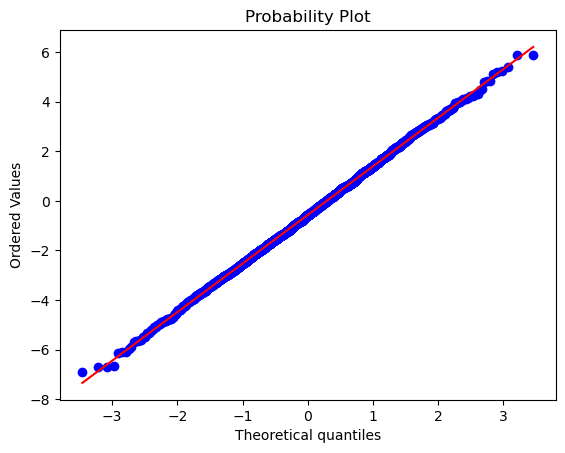

Weight


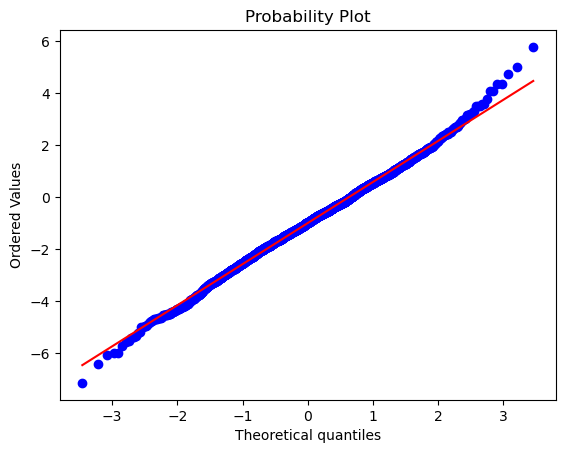

Sweetness


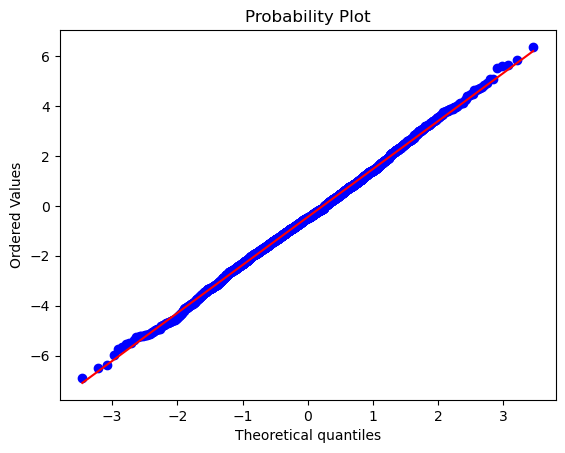

Crunchiness


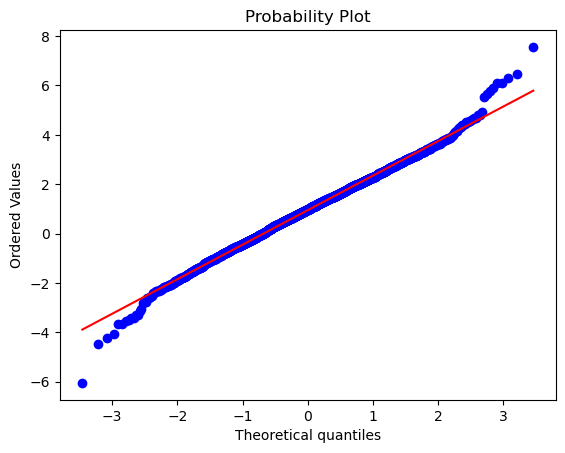

Juiciness


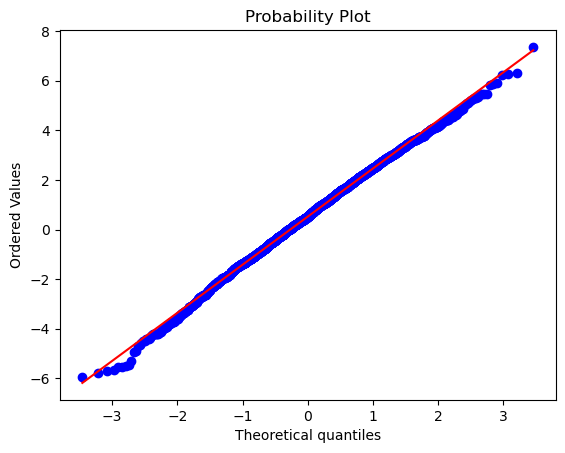

Ripeness


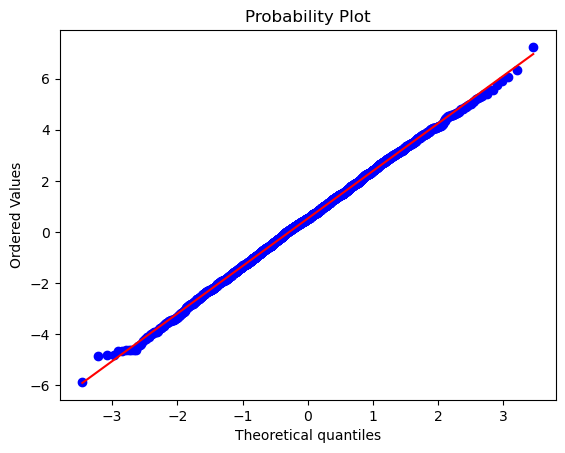

Acidity


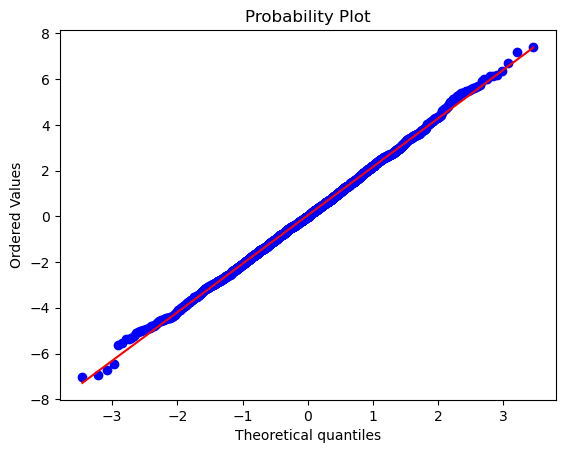

In [38]:
# Checking whether my train data is following guassian distribution because we need to apply the train data to our guassian naive bayes algorithm
import scipy.stats as ss
plt.subplot(111)
for j in x_train.columns:
    print(j)
    ss.probplot(x_train[j],dist="norm",fit=True,plot=plt)
    plt.show()

Size


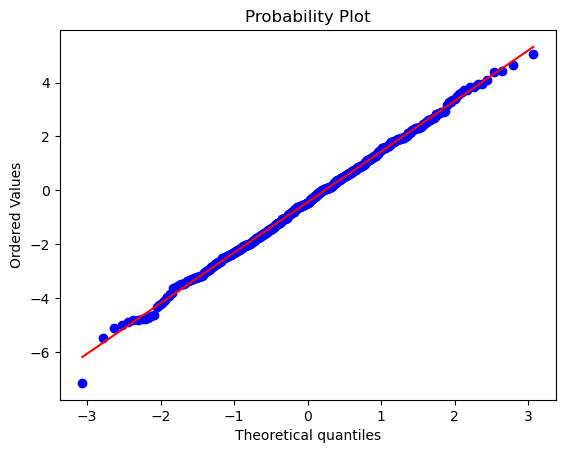

Weight


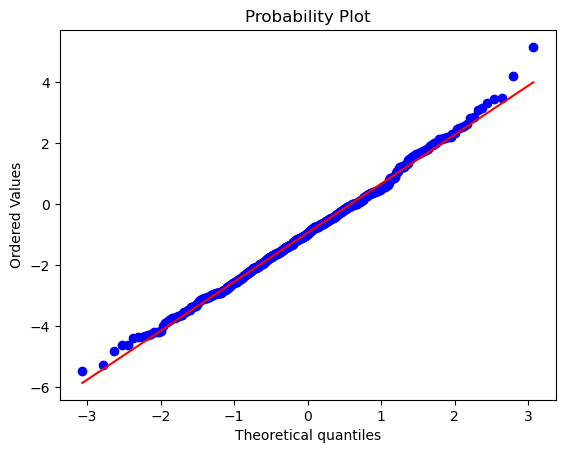

Sweetness


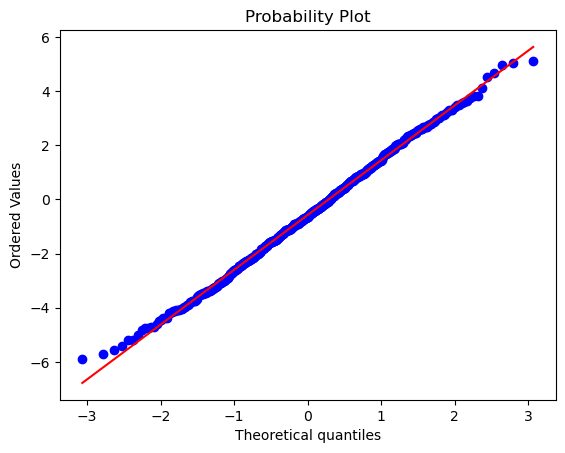

Crunchiness


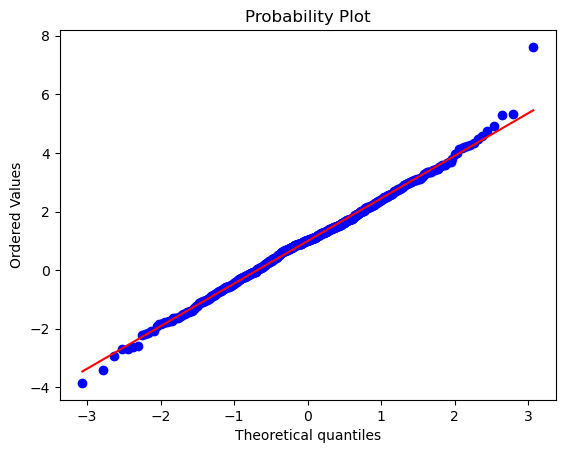

Juiciness


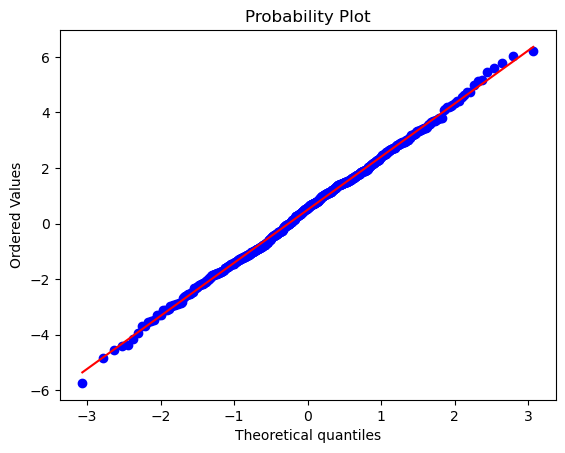

Ripeness


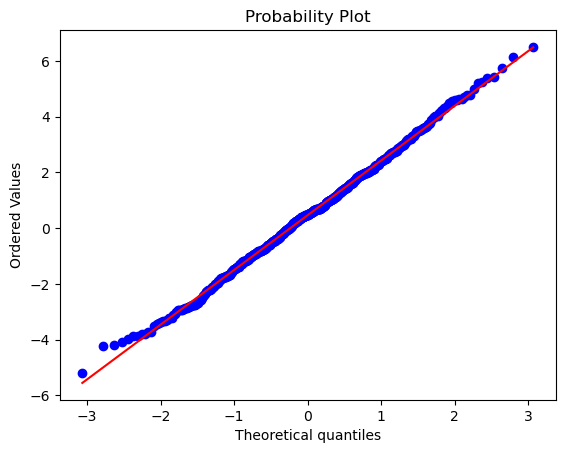

Acidity


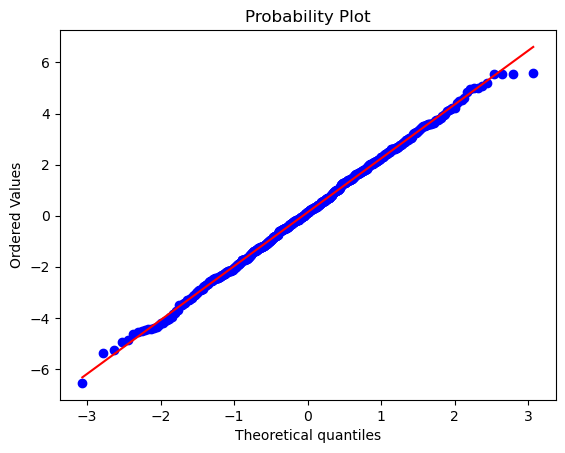

In [39]:
# Checking whether my cv data is following guassian distribution because we need to apply the cv data to our guassian naive bayes model
import scipy.stats as ss
plt.subplot(111)
for j in x_train.columns:
    print(j)
    ss.probplot(x_cv[j],dist="norm",fit=True,plot=plt)
    plt.show()

### All the columns are following guassian distribution so i can apply Guassian Naive Bayes to my training data

### 7.Training and evaluation

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [41]:
tr_error=[]
cv_error=[]
for i in range(1,31):
    g=GaussianNB(var_smoothing=i)
    model=g.fit(x_train,y_train)
    pre_tr=model.predict(x_train)
    pre_cv=model.predict(x_cv)
    tr_error.append(1-accuracy_score(pre_tr,y_train))
    cv_error.append(1-accuracy_score(pre_cv,y_cv))

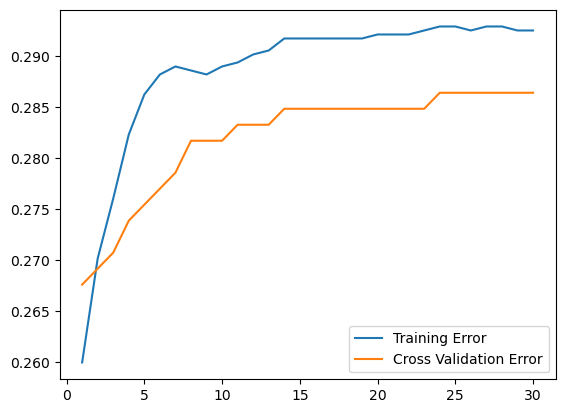

In [42]:
plt.plot(range(1,31),tr_error,label="Training Error")
plt.plot(range(1,31),cv_error,label="Cross Validation Error")
plt.legend()
plt.show()

In [43]:
g=GaussianNB(var_smoothing=1)
model=g.fit(x_train,y_train)
prediction=model.predict(x_test)
print(accuracy_score(prediction,y_test)*100)
# Now our created model has 72% Generalized Accuracy

72.090112640801


In [44]:
cm=confusion_matrix(y_test,prediction)

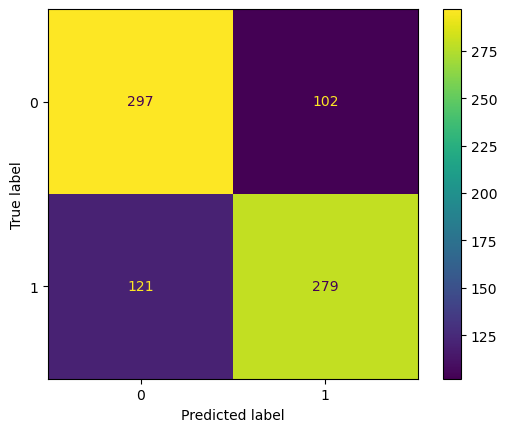

In [45]:
i=ConfusionMatrixDisplay(cm)
i.plot()
plt.show()

In [46]:
from sklearn.metrics import precision_score,recall_score

In [47]:
precision_score(y_test,prediction) # Precision for good i.e. 1 class

0.7322834645669292

In [48]:
precision_score(y_test,prediction,pos_label=0) # Precision for bad i.e. 0 class

0.7105263157894737

In [49]:
recall_score(y_test,prediction) # Recall for good class label as by default pos_label=1 i.e. 1 class

0.6975

In [50]:
recall_score(y_test,prediction,pos_label=0) # Recall for bad class label as pos_label=0 i.e. 0 class

0.7443609022556391

In [51]:
from sklearn.metrics import f1_score

In [52]:
f1_score(y_test,prediction,pos_label=1) # F1-Score for good class label i.e. 1 class

0.7144686299615877

In [53]:
f1_score(y_test,prediction,pos_label=0) # F1-Score for bad class label i.e. 0 class

0.7270501835985311

In [54]:
from sklearn.metrics import classification_report # Gives precision, recall and f1-score in a single time

In [55]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       399
           1       0.73      0.70      0.71       400

    accuracy                           0.72       799
   macro avg       0.72      0.72      0.72       799
weighted avg       0.72      0.72      0.72       799



In [56]:
# Accuracy is also called as micro average
# Macro average is the average of the precision of both classes
# Weighted average is the multiplication of (399*precision of 0+400*precison of 1)/2

In [57]:
from sklearn.metrics import roc_curve,roc_auc_score

In [58]:
pr=model.predict_proba(x_test) # To predict the probabilities instead of class labels

In [59]:
pr[:,1] # To take probability of only 2nd column i.e. probability of 1 class label

array([0.37675381, 0.50757343, 0.47081517, 0.50958328, 0.67269076,
       0.45761971, 0.78914352, 0.46085503, 0.47510058, 0.622847  ,
       0.44608225, 0.31484105, 0.47470014, 0.42132822, 0.70605609,
       0.44485193, 0.38394797, 0.60507516, 0.45571283, 0.3961039 ,
       0.45210195, 0.51639774, 0.5292771 , 0.50768975, 0.47257078,
       0.38913532, 0.64590846, 0.31455108, 0.501885  , 0.49870113,
       0.62339784, 0.56576976, 0.41011368, 0.53643424, 0.64719817,
       0.68336776, 0.51759974, 0.60148118, 0.53363788, 0.56327142,
       0.39198253, 0.51775496, 0.62864437, 0.63384237, 0.64975674,
       0.46487112, 0.46851946, 0.76609934, 0.52504111, 0.64608119,
       0.4578498 , 0.426476  , 0.40982296, 0.28087803, 0.27342153,
       0.48076092, 0.605602  , 0.36260293, 0.41438888, 0.64001734,
       0.55392445, 0.6875677 , 0.30598399, 0.66643701, 0.41611945,
       0.6300844 , 0.4515231 , 0.71196477, 0.4249015 , 0.43059118,
       0.25233669, 0.48309796, 0.484374  , 0.50941436, 0.59526

In [60]:
fpr,tpr,_=roc_curve(y_test,pr[:,1]) # To take fpr,tpr values and to skip the third value we use _.

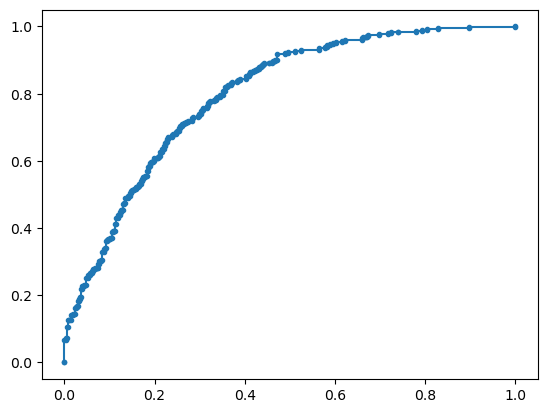

In [61]:
plt.plot(fpr,tpr,marker=".")
plt.show()

In [62]:
roc_auc_score(y_test,pr[:,1])

0.7977568922305764

### 8.Deployment

In [63]:
import pickle

In [64]:
pickle.dump(model,open(r"C:\Users\Mahammad Iliyas\Downloads\apple_quality.pkl","wb"))

In [65]:
fm=pickle.load(open(r"C:\Users\Mahammad Iliyas\Downloads\apple_quality.pkl","rb"))

In [66]:
fm

GaussianNB(var_smoothing=1)

In [67]:
fm.predict(x_test)

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,